In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
import image_helper
import skimage.measure
import scipy.signal

In [3]:
IMAGE_PATH = 'DIPSourceHW2.png'
RESULT_PATH = './output/'
SIZE = 256
WHITE_LEVEL = 255
ALPHA = 3

To do this exercise, please download the source image DIPSourceHW2.png from here. We
will treat this image as our continuous scene $f (x)$.

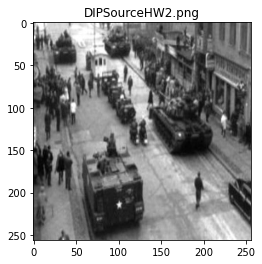

In [4]:
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE) 
if (image is None):
    raise Exception(f'image not found at {IMAGE_PATH}')
image = image / WHITE_LEVEL  #normaliztig
image = cv2.resize(image, (SIZE, SIZE))
image_helper.plot_image(image, f'{IMAGE_PATH}')


In [5]:
height = 346
width = 550

Create two high-resolution and two low-resolution versions of the source image, once
using a $sinc$ filter and once using a Gaussian filter. You may choose any $\alpha \in \mathbb{N}$.


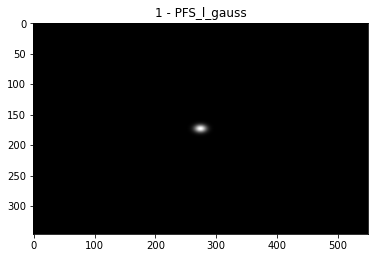

<Figure size 432x288 with 0 Axes>

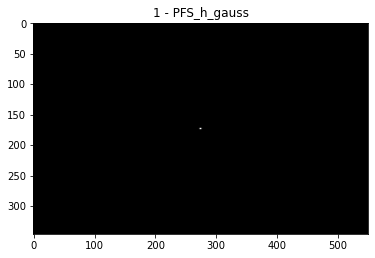

<Figure size 432x288 with 0 Axes>

In [6]:
PFS_l_gauss = image_helper.PSF_Gauss(width,height,0.25)
PFS_h_gauss = image_helper.PSF_Gauss(width,height,0.04)
#PFS_l_gauss = image_helper.gaussian_kernel(SIZE,0.25)
#PFS_h_gauss = image_helper.gaussian_kernel(SIZE,0.04)
image_helper.plot_image(PFS_l_gauss, '1 - PFS_l_gauss',RESULT_PATH)
image_helper.plot_image(PFS_h_gauss, '1 - PFS_h_gauss',RESULT_PATH)

array([[0.02777778, 0.02777778, 0.02777778, ..., 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, ..., 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, ..., 0.02777778, 0.02777778,
        0.02777778],
       ...,
       [0.02777778, 0.02777778, 0.02777778, ..., 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, ..., 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, ..., 0.02777778, 0.02777778,
        0.02777778]])

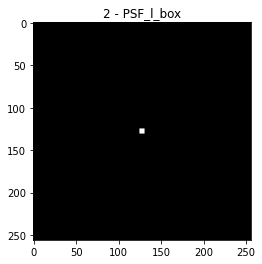

<Figure size 432x288 with 0 Axes>

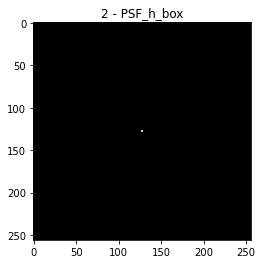

<Figure size 432x288 with 0 Axes>

In [17]:
PSF_l_box = image_helper.PSF_box(SIZE,SIZE,6)
PSF_h_box = image_helper.PSF_box(SIZE,SIZE,3)
image_helper.plot_image(PSF_l_box, '2 - PSF_l_box',RESULT_PATH)
image_helper.plot_image(PSF_h_box, '2 - PSF_h_box',RESULT_PATH)

Estimate the filters from the downsampled images using the algorithm you have designed.
It is advisable to obtain the largest possible collection of high-resolution patches
$\{pi\}$, while adopting some of the implementation tricks from NLM in order to improve
complexity. You may not use the high-resolution images in your algorithm.


In [19]:
gauss_l = scipy.signal.convolve2d(image, PFS_l_gauss, mode='same', boundary='wrap')
gauss_h = scipy.signal.convolve2d(image, PFS_h_gauss, mode='same', boundary='wrap')
box_l = scipy.signal.convolve2d(image, PSF_l_box, mode='same', boundary='wrap')
box_h = scipy.signal.convolve2d(image, PSF_h_box, mode='same', boundary='wrap')

In [20]:
print(f"gauss_l_psnr = {skimage.metrics.peak_signal_noise_ratio(image, gauss_l):.2f}")
print(f"gauss_h_psnr = {skimage.metrics.peak_signal_noise_ratio(image, gauss_h):.2f}")
print(f"box_l_psnr = {skimage.metrics.peak_signal_noise_ratio(image, box_l):.2f}")
print(f"box_h_psnr = {skimage.metrics.peak_signal_noise_ratio(image, box_h):.2f}")

gauss_l_psnr = nan
gauss_h_psnr = nan
box_l_psnr = 25.02
box_h_psnr = 9.91


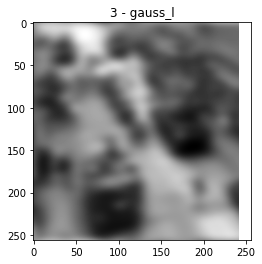

<Figure size 432x288 with 0 Axes>

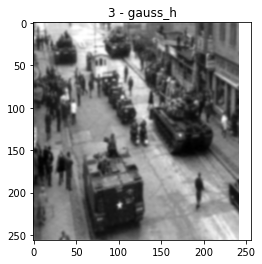

<Figure size 432x288 with 0 Axes>

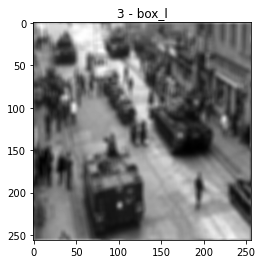

<Figure size 432x288 with 0 Axes>

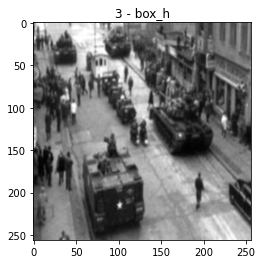

<Figure size 432x288 with 0 Axes>

In [21]:
image_helper.plot_image(gauss_l, f'3 - gauss_l',RESULT_PATH)
image_helper.plot_image(gauss_h, f'3 - gauss_h',RESULT_PATH)
image_helper.plot_image(box_l, f'3 - box_l',RESULT_PATH)
image_helper.plot_image(box_h, f'3 - box_h',RESULT_PATH)


For each of the two recovered kernels, construct two high-resolution images, one from
the low-resolution image the kernel was extracted from, and one from the other lowresolution image.

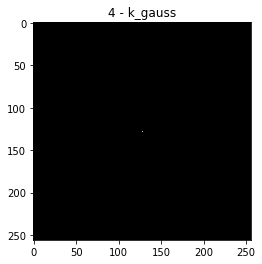

<Figure size 432x288 with 0 Axes>

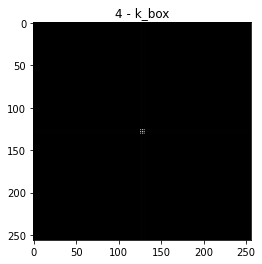

<Figure size 432x288 with 0 Axes>

In [10]:
k_gauss = image_helper.blur_kernel_k(PFS_l_gauss, PFS_h_gauss)
k_box = image_helper.blur_kernel_k(PSF_l_box, PSF_h_box)
image_helper.plot_image(k_gauss, '4 - k_gauss',RESULT_PATH)
image_helper.plot_image(k_box, '4 - k_box',RESULT_PATH)

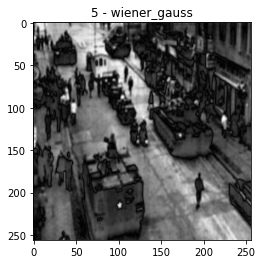

<Figure size 432x288 with 0 Axes>

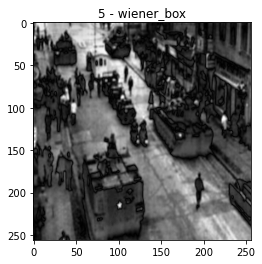

8.522533545282748
15.668775690717165


<Figure size 432x288 with 0 Axes>

In [11]:
wiener_gauss = image_helper.wiener(gauss_l, k_gauss)
wiener_box = image_helper.wiener(box_l, k_box)
image_helper.plot_image(wiener_gauss, '5 - wiener_gauss',RESULT_PATH)
image_helper.plot_image(wiener_box, '5 - wiener_box',RESULT_PATH)
print(skimage.metrics.peak_signal_noise_ratio(wiener_gauss, gauss_h))
print(skimage.metrics.peak_signal_noise_ratio(wiener_box, box_h))

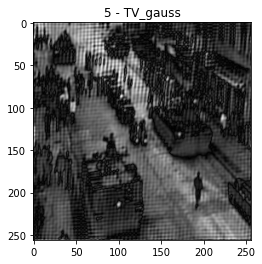

<Figure size 432x288 with 0 Axes>

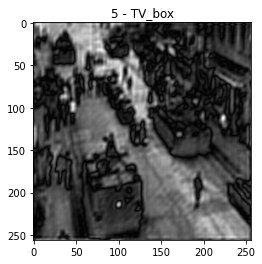

8.598847623063817
15.595654370827427


<Figure size 432x288 with 0 Axes>

In [10]:
TV_gauss = image_helper.TV(gauss_l, k_gauss)
TV_box = image_helper.TV(box_l, k_box)
image_helper.plot_image(TV_gauss, '5 - TV_gauss',RESULT_PATH)
image_helper.plot_image(TV_box, '5 - TV_box',RESULT_PATH)
print(skimage.metrics.peak_signal_noise_ratio(TV_gauss, gauss_h))
print(skimage.metrics.peak_signal_noise_ratio(TV_box, box_h))

Evaluate the PSNR for each of the high-resolution images you have obtained.


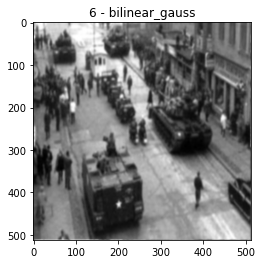

<Figure size 432x288 with 0 Axes>

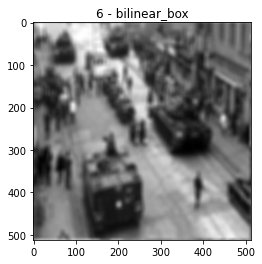

<Figure size 432x288 with 0 Axes>

In [15]:
bilinear_gauss = cv2.resize(gauss_l, dsize=None, fx=2, fy=2)
bilinear_box = cv2.resize(box_l, dsize=None, fx=2, fy=2)
image_helper.plot_image(bilinear_gauss, '6 - bilinear_gauss',RESULT_PATH)
image_helper.plot_image(bilinear_box, '6 - bilinear_box',RESULT_PATH)
#print(skimage.metrics.peak_signal_noise_ratio(bilinear_gauss, gauss_h))
#print(skimage.metrics.peak_signal_noise_ratio(bilinear_box, box_h))

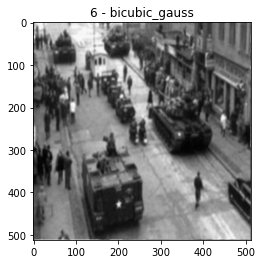

<Figure size 432x288 with 0 Axes>

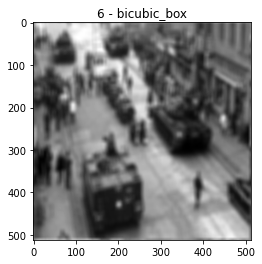

<Figure size 432x288 with 0 Axes>

In [17]:
bicubic_gauss = cv2.resize(gauss_l, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
bicubic_box = cv2.resize(box_l, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
image_helper.plot_image(bicubic_gauss, '6 - bicubic_gauss',RESULT_PATH)
image_helper.plot_image(bicubic_box, '6 - bicubic_box',RESULT_PATH)
#print(skimage.metrics.peak_signal_noise_ratio(bicubic_gauss, gauss_h))
#print(skimage.metrics.peak_signal_noise_ratio(bicubic_box, box_h))